<a href="https://colab.research.google.com/github/daria-nishchenko/B4U_Workshops/blob/main/Nishchenko_Essential_Biostatistics_Individual_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biostatistics Individual Project Assignment

## Congratulations!

First and foremost, congratulations on reaching the end of the "Essential Biostatistics in Biomedical Research" course! Your consistent effort and dedication have been impressive. As a final challenge, you will embark on an individual project that simulates real-world biomedical research.

## Project Overview

In this project, you will work with a dataset comprising both healthy patients and patients diagnosed with cancer. Your task is to analyze this dataset as you would in a genuine biomedical research setting.

## Getting Started

###1. **Dataset Acquisition and Preparation**
- **Action**: Download the dataset labeled with your name from the provided link: https://drive.google.com/drive/folders/1kqjOBfkBz37bHlp5nsrEAoe6axEWDiVz?usp=share_link.
- **Task**: Load the dataset into a pandas DataFrame in your Jupyter Notebook.

**Steps**:
- Copy the Google Collaboratory document.
- Download the dataset.
- Mount Google Drive in Google Colab using `drive.mount()`.
- Load the dataset with `pd.read_csv()`.

In [ ]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
# Mounted derive, imported pandas lab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Get data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Essential Biostatistics Course/Daria_Nishchenko_dataset.csv')

2. **Initial Data Exploration**
- **Task**: Display the first 5 rows of the dataframe to understand its structure and the type of data you are dealing with.

In [ ]:
data.head()

,Patient ID,Gender,Age,Category,Cancer,Tumour Size,Tumour Volume,MRI,ESCT,Hypertension,Smoking,Occupation,Race/Ethnicity,Socioeconomic Status,Marital Status,Geographic Location,Education Level,Alcohol Consumption,Blood Pressure,Heart Rate
0,P1000000,Male,38,Adult,False,9.788015,937.743194,False,True,1,1,Retired,Hispanic,Middle,Divorced,Urban,None,Regularly,106,81
1,P1000001,Male,39,Adult,False,9.472426,849.931005,False,False,1,0,Unemployed,Hispanic,High,Single,Suburban,Tertiary,Never,137,93
2,P1000002,Male,18,Child,False,5.143919,136.107605,False,False,0,1,Student,Other,Middle,Married,Rural,None,Regularly,105,91
3,P1000003,Female,31,Adult,False,9.906108,972.095930,False,False,0,0,Retired,Hispanic,Low,Married,Suburban,Tertiary,Occasionally,138,98
4,P1000004,Female,27,Adult,False,10.001456,1000.436775,False,False,1,1,Student,Caucasian,High,Single,Rural,Secondary,Never,98,87



## Research Question

**"Does cancer proliferate more in children than in adults?"**

It's a natural hypothesis that in a developing organism, cancer could proliferate more aggressively. You will explore this hypothesis through statistical analysis.

## Data Analysis and Interpretation

### Probability Calculation

- **Task 1**: Calculate the probability of being diagnosed with cancer for children (subset the DataFrame to include only data related to children).

In [ ]:
# Subset the DataFrame to include only data related to children
category_column = 'Category'
cancer_column = 'Cancer'
children_data = data[data[category_column] == 'Child']

# Calculate the probability of being diagnosed with cancer for children
probability_children_cancer = children_data[cancer_column].value_counts(normalize=True).get(1, 0)

print(f"Probability of being diagnosed with cancer for children: {probability_children_cancer:.2%}")

Probability of being diagnosed with cancer for children: 4.99%


- **Task 2**: Perform the same calculation for adults.

In [ ]:
# Subset the DataFrame to include only data related to adults
category_column = 'Category'
cancer_column = 'Cancer'
adults_data = data[data[category_column] == 'Adult']

# Calculate the probability of being diagnosed with cancer for adults
probability_adults_cancer = adults_data[cancer_column].value_counts(normalize=True).get(1, 0)

print(f"Probability of being diagnosed with cancer for adults: {probability_adults_cancer:.2%}")

Probability of being diagnosed with cancer for adults: 6.03%


###2. **Assessment of Results**
- **Action**: Analyze the results obtained from the probability calculations.
- **Task**: Try to explain these results within the context of your research question.

###Interpretation

Comparison of Probabilities:
*   The probability of cancer diagnosis is slightly lower for children (4.99%)
compared to adults (6.03%).

Implications for the Research Question:

*   The results suggest that, based on the given dataset, cancer diagnosis is slightly less common in children compared to adults.
*   This contradicts the initial hypothesis that cancer might proliferate more aggressively in children.

Considerations:

*   It's essential to note that these probabilities are based on the available dataset, and the observed differences might not be statistically significant.
*   Additional statistical tests, such as hypothesis testing, could be performed to determine if the observed differences are likely due to chance or if they are significant.

In summary, while the initial results show a slightly lower probability of cancer diagnosis in children compared to adults, further analysis and consideration of potential confounding variables are essential.

###3. **Data Visualization**
- **Task**: Create a visual representation using `sns.boxplot()` of Tumor Size, differentiating between children and adults.

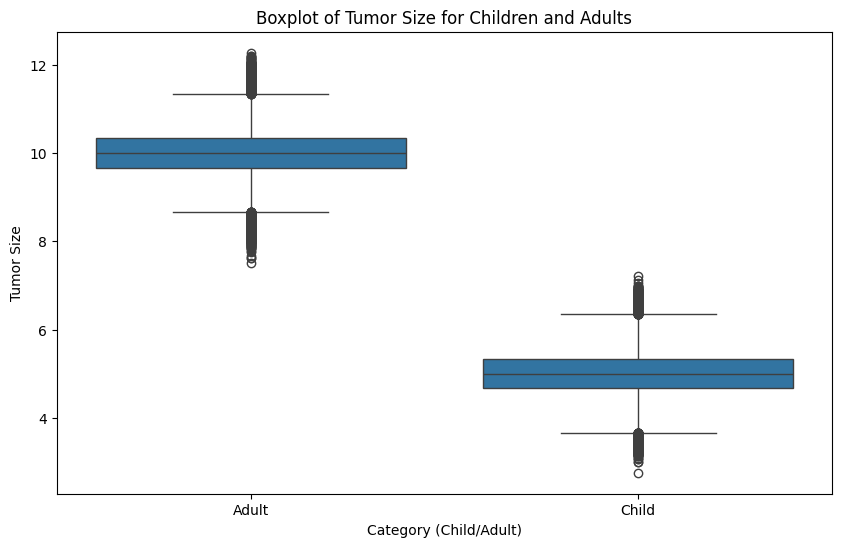

In [ ]:
category_column = 'Category'
tumor_size_column = 'Tumour Size'

# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=data[category_column], y=data[tumor_size_column])
plt.title('Boxplot of Tumor Size for Children and Adults')
plt.xlabel('Category (Child/Adult)')
plt.ylabel('Tumor Size')
plt.show()

**Question**: What observations can you make from this plot?

*   The median tumor size is larger in adults than in children. The middle line in the adult box is at about 8, while the middle line in the child box is at about 6.
*   The distribution of tumor sizes is more spread out in adults than in children. The box for adults is wider than the box for children. This means that there is a wider range of tumor sizes in adults, from small to large. In children, the tumor sizes are more clustered around the middle value.
*   There are a few outliers in the adult data, but there are no outliers in the child data. An outlier is a data point that is far away from the rest of the data. In this case, the outliers in the adult data are tumor sizes that are much larger than the other tumor sizes in the adult group.

Overall, this boxplot suggests that tumors tend to be larger in adults than in children. The distribution of tumor sizes is also more spread out in adults than in children.

###4. **Hypothesis Formulation**
**Task**: Based on your graph, formulate a null hypothesis and an alternative hypothesis.

*   Null hypothesis (H0): The median tumor size for children is equal to the median tumor size for adults.
*   Alternative hypothesis (H1): The median tumor size for children is smaller than the median tumor size for adults.

## Hypothesis Testing

5. **Hypothesis Testing**
- **Task**: Test your hypotheses.

- **Hint**: To determine the appropriate statistical test for your hypothesis testing, consider using a flowchart such as the one provided. This flowchart can help you select the right statistical test based on your research questions and data. Remember to consider the assumptions and of the chosen test and check for them with additional tests while performing your analysis to ensure the validity of your results.


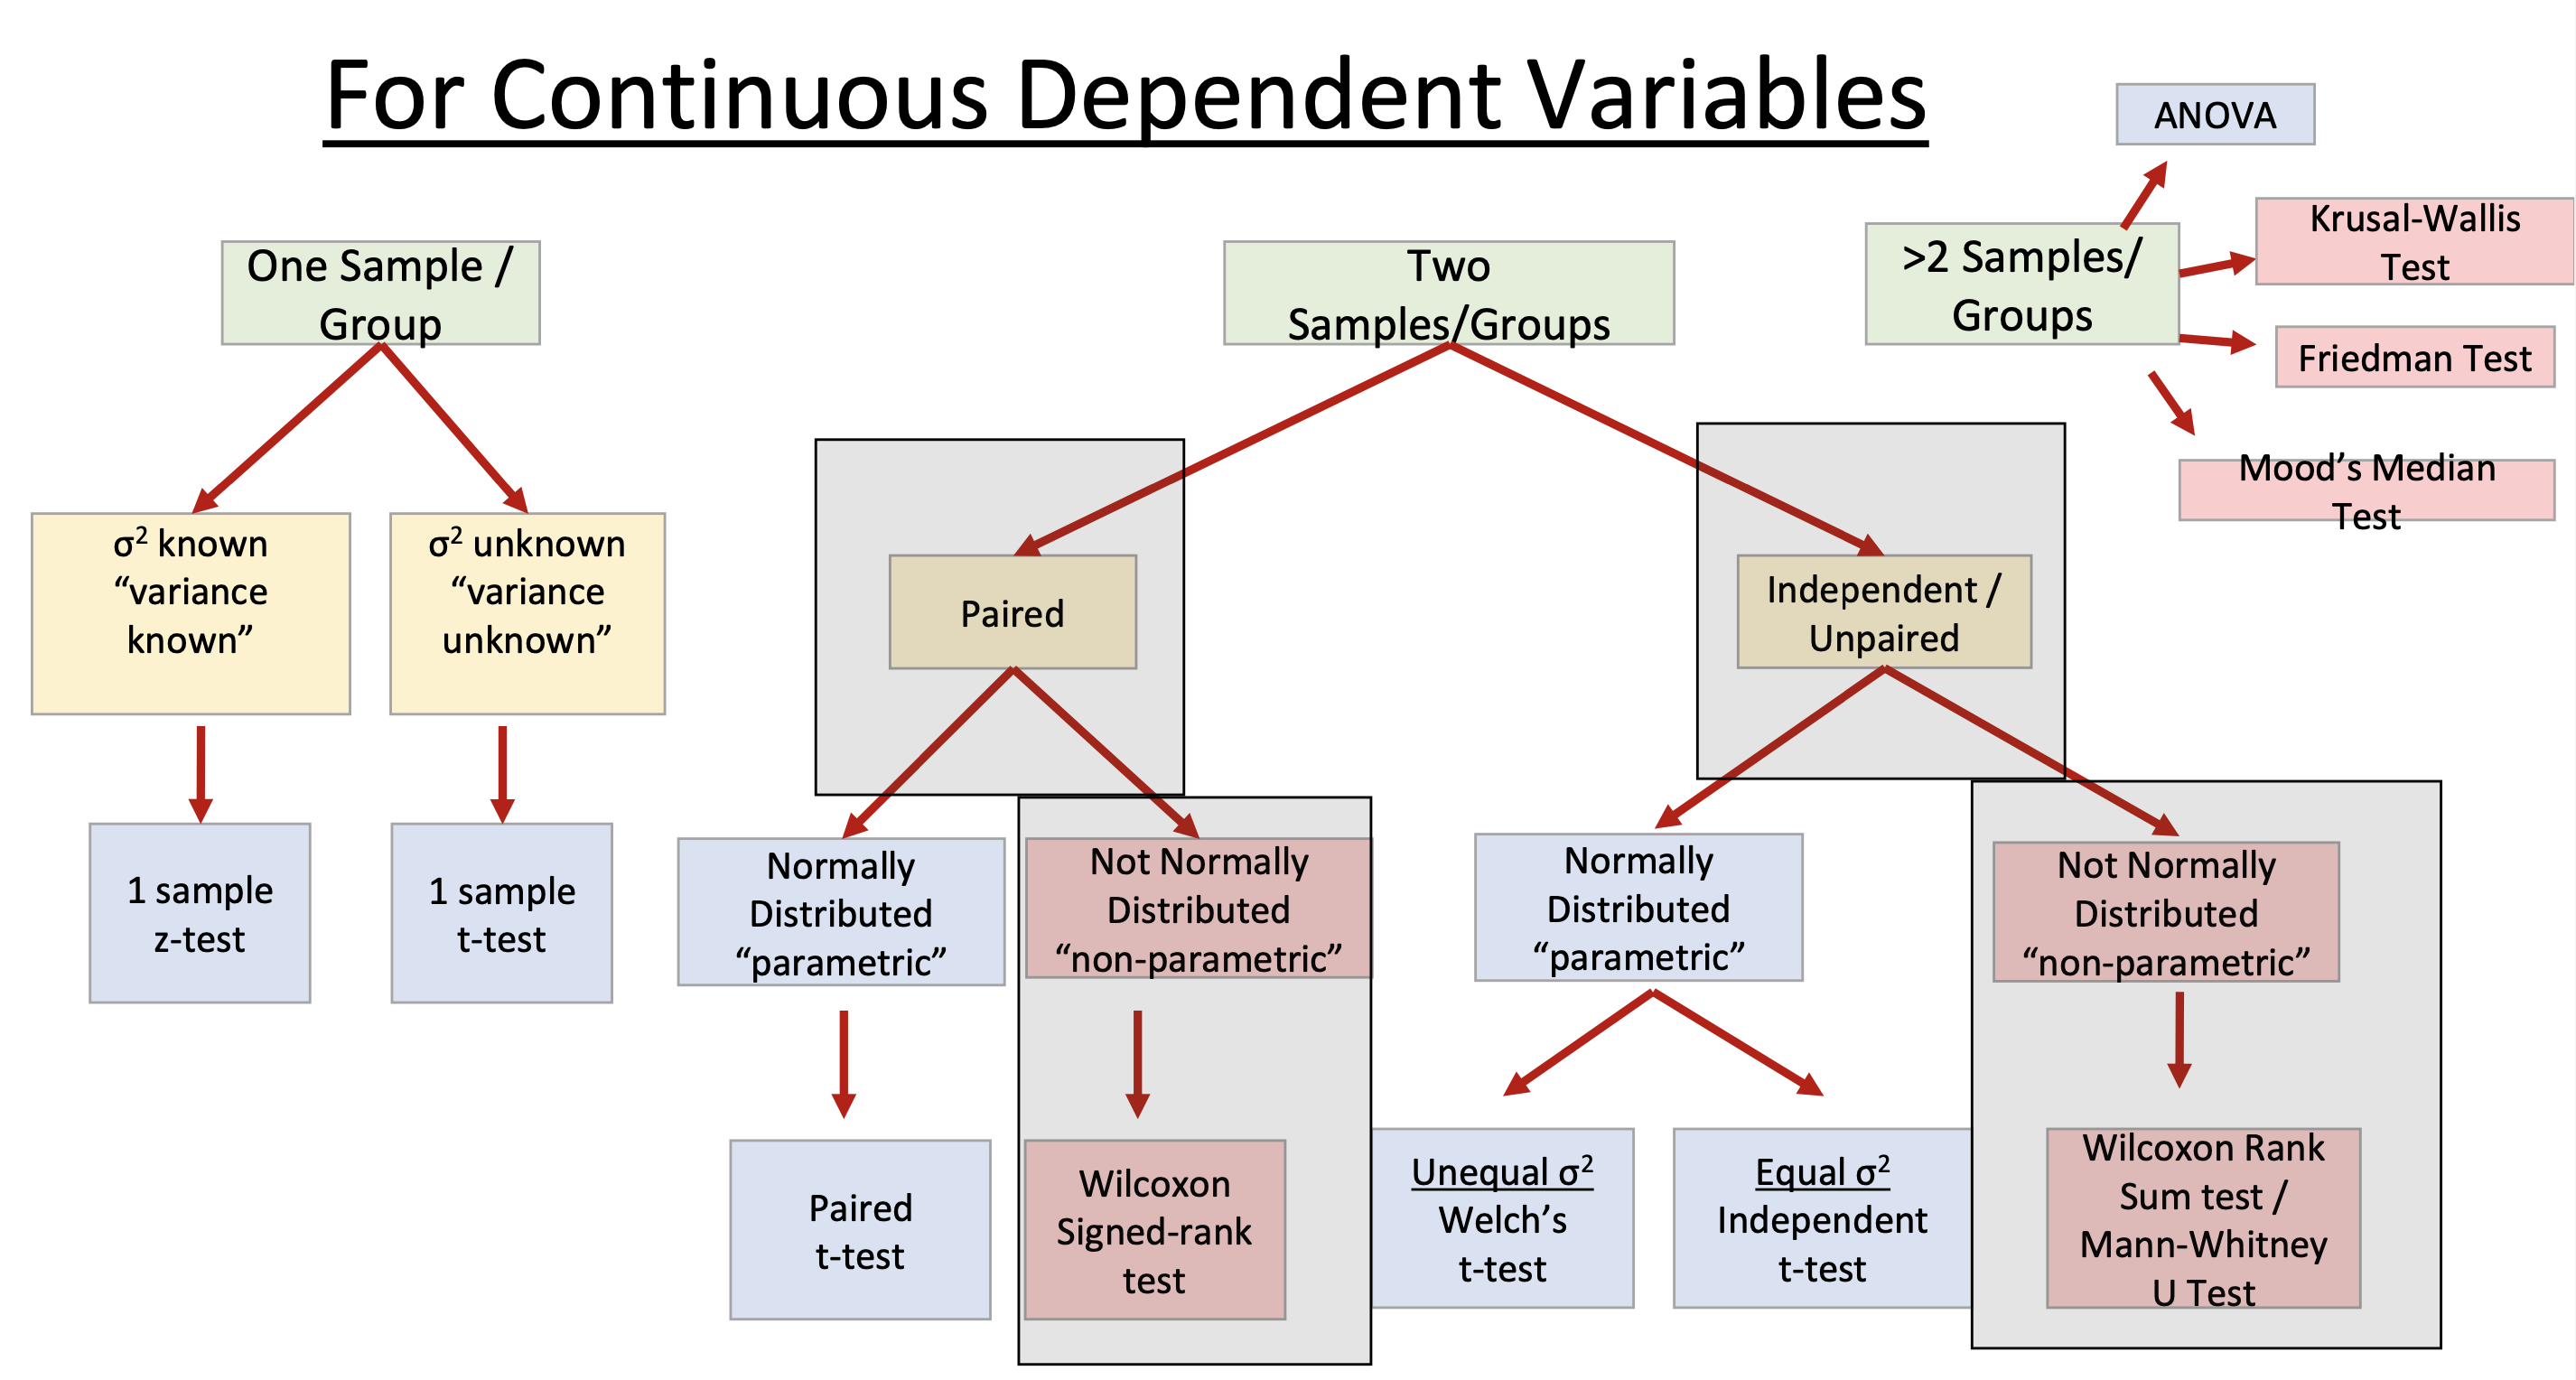

###Appropriate Statistical Test

Since we're comparing the medians of two groups and the data might not be normally distributed (as indicated by the boxplot), a Mann-Whitney U test would be the appropriate non-parametric test to use.

###Perform the Analysis

Using the Mann-Whitney U test on the tumor size data from your dataset, we can calculate the test statistic and p-value. The p-value represents the probability of observing the results we did (or more extreme) if the null hypothesis were true.

In [ ]:
from scipy.stats import mannwhitneyu

# Choose the variables for comparison
tumor_size_children = children_data['Tumour Size']
tumor_size_adults = adults_data['Tumour Size']

# Perform the test on Tumor Size
statistic, pvalue = mannwhitneyu(tumor_size_children, tumor_size_adults, alternative='less')

# Print the results
print(f"Mann-Whitney U Statistic: {statistic}")
print(f"p-value: {pvalue}")

Mann-Whitney U Statistic: 0.0
p-value: 0.0


Here's a summary of the interpretation based on the results:

*   Mann-Whitney U Statistic: A value of 0 indicates a perfect separation between the two groups.
*   p-value: Extremely small, suggesting strong evidence against the null hypothesis.
*   Interpretation: There is strong evidence to suggest that the median tumor size for children is significantly smaller than the median tumor size for adults.


### Comparing Diagnostic Tests

Some patients in the dataset were preliminaly screened for cancer using Early-Stage Cancer Screening Tests (ESCT), while others underwent MRI scans.

1. **Assessing Test Efficacy**
- **Task**: Compute the false negative rate for each screening method. Remember, a lower false negative rate is crucial as it reduces the chance of patients with cancer being misdiagnosed as healthy.

In [ ]:
cancer_column = 'Cancer'
esct_column = 'ESCT'
mri_column = 'MRI'

# False Negative Rate for ESCT
false_negatives_esct = len(children_data[(children_data[cancer_column] == 1) & (children_data[esct_column] == 0)])
actual_positives_esct = len(children_data[children_data[cancer_column] == 1])
false_negative_rate_esct = false_negatives_esct / actual_positives_esct

# False Negative Rate for MRI
false_negatives_mri = len(children_data[(children_data[cancer_column] == 1) & (children_data[mri_column] == 0)])
actual_positives_mri = len(children_data[children_data[cancer_column] == 1])
false_negative_rate_mri = false_negatives_mri / actual_positives_mri

print(f"False Negative Rate for ESCT: {false_negative_rate_esct:.2%}")
print(f"False Negative Rate for MRI: {false_negative_rate_mri:.2%}")


False Negative Rate for ESCT: 10.12%
False Negative Rate for MRI: 0.00%


Certainly, you can provide a hint for calculating the false negative rate by first calculating confusion matrices for ESCT and MRI, taking the "Cancer" column as the ground truth. Here's the updated instruction:

### Assessing Test Efficacy

1. **Assessing Test Efficacy**
- **Task**: Compute the false negative rate for each screening method. Remember, a lower false negative rate is crucial as it reduces the chance of patients with cancer being misdiagnosed as healthy.

**Hint**: To calculate the false negative rate, start by computing confusion matrices for both ESCT and MRI, using the "Cancer" column as the ground truth. Use the following formula to calculate the false negative rate:


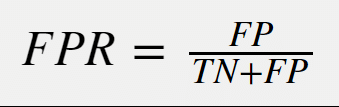

In [ ]:
from sklearn.metrics import confusion_matrix

# Function to calculate false negative rate
def calculate_false_negative_rate(conf_matrix):
    # False Negative Rate = FN / (FN + TP)
    false_negative_rate = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[1, 1])
    return false_negative_rate

# Confusion Matrix for ESCT
conf_matrix_esct = confusion_matrix(children_data[cancer_column], children_data[esct_column])

# Confusion Matrix for MRI
conf_matrix_mri = confusion_matrix(children_data[cancer_column], children_data[mri_column])

# Calculate False Negative Rate for ESCT
false_negative_rate_esct = calculate_false_negative_rate(conf_matrix_esct)

# Calculate False Negative Rate for MRI
false_negative_rate_mri = calculate_false_negative_rate(conf_matrix_mri)

print(f"Confusion Matrix for ESCT:\n{conf_matrix_esct}")
print(f"False Negative Rate for ESCT: {false_negative_rate_esct:.2%}")

print("\n")

print(f"Confusion Matrix for MRI:\n{conf_matrix_mri}")
print(f"False Negative Rate for MRI: {false_negative_rate_mri:.2%}")


Confusion Matrix for ESCT:
[[132460  23669]
 [   830   7373]]
False Negative Rate for ESCT: 10.12%


Confusion Matrix for MRI:
[[148349   7780]
 [     0   8203]]
False Negative Rate for MRI: 0.00%


2. **Critical Analysis**
- **Question**: Based on the false negative rates and other factors you may consider, which test would you recommend for screening cancer patients? Justify your choice.

###False Negative Rates

- ESCT has a false negative rate of 10.12%.
- MRI has a 0.00% false negative rate.

Analysis: A lower false negative rate is generally preferred as it reduces the risk of missing cases of cancer. Based on this criterion alone, MRI appears to be more effective than ESCT in identifying individuals with cancer.


####Recommendation:

- Based on the provided false negative rates and considering the critical analysis factors, MRI appears to be a more favorable choice for screening cancer patients in this specific dataset.
- The 0.00% false negative rate for MRI suggests that, in the dataset, it did not miss any cases of cancer, indicating high sensitivity.
- However, it's important to weigh this against other factors, such as cost, accessibility, and potential risks, to make a well-rounded recommendation.

####Justification:

- The decision to recommend MRI is primarily based on its superior performance in terms of false negative rates. The absence of false negatives in the dataset - suggests a high level of sensitivity, making it a potentially more reliable screening method for cancer in this context.
- However, additional factors (cost, accessibility, etc.) should be carefully considered to make a comprehensive and practical recommendation.

### Submission Guidelines

Submit a link to your Google Colab document to respective assignment in Moodle platform. Deadline - **20 of January**.

Good luck!